In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csvframe = pd.read_excel('ABB dataset 2.xlsx')
csvframe

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,21.139999,21.280001,21.110001,21.280001,16.816923,2009000
1,2017-01-04,21.150000,21.379999,21.139999,21.370001,16.888046,2333100
2,2017-01-05,21.350000,21.580000,21.350000,21.559999,17.038197,1515100
3,2017-01-06,21.620001,21.680000,21.559999,21.600000,17.069805,1118300
4,2017-01-09,21.410000,21.549999,21.379999,21.500000,16.990778,1359100
...,...,...,...,...,...,...,...
1698,2023-10-03,35.389999,35.660000,35.250000,35.349998,35.349998,176300
1699,2023-10-04,35.770000,35.770000,35.279999,35.660000,35.660000,144000
1700,2023-10-05,35.750000,35.860001,35.630001,35.810001,35.810001,383600
1701,2023-10-06,35.869999,36.650002,35.720001,36.520000,36.520000,571800


In [3]:
csvframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1.703000e+03
mean,26.924304,27.096629,26.755367,26.930405,24.540809,1.882177e+06
std,6.078555,6.112995,6.051969,6.084441,6.933163,1.048046e+06
min,15.310000,15.620000,14.710000,14.850000,13.093404,9.450000e+04
25%,22.495000,22.595000,22.389999,22.520001,18.762649,1.220000e+06
50%,25.540001,25.680000,25.360001,25.480000,21.788494,1.676800e+06
75%,32.420000,32.754999,32.179998,32.504999,31.048367,2.289750e+06
max,41.020000,41.029999,40.310001,40.650002,40.650002,1.142610e+07


In [4]:
csvframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,21.139999,21.280001,21.110001,21.280001,16.816923,2009000
1,2017-01-04,21.150000,21.379999,21.139999,21.370001,16.888046,2333100
2,2017-01-05,21.350000,21.580000,21.350000,21.559999,17.038197,1515100
3,2017-01-06,21.620001,21.680000,21.559999,21.600000,17.069805,1118300
4,2017-01-09,21.410000,21.549999,21.379999,21.500000,16.990778,1359100


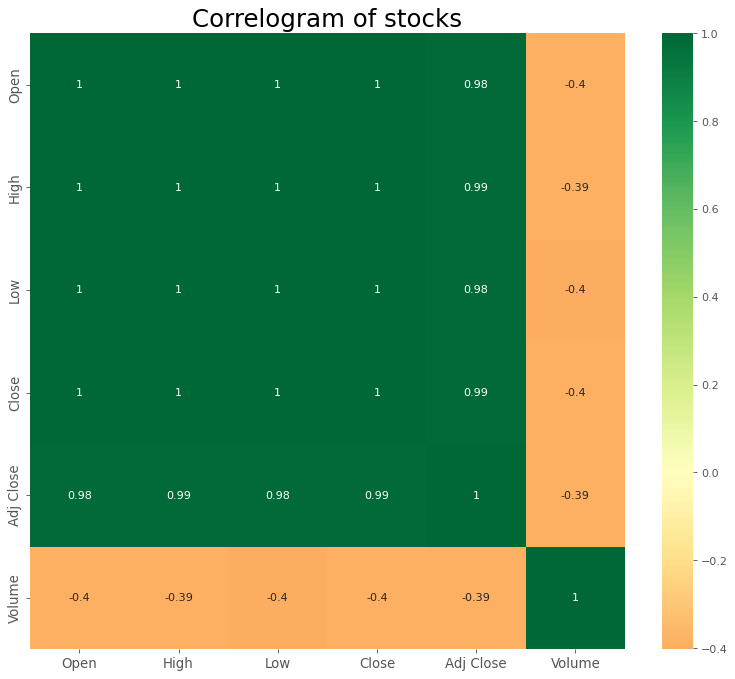

In [217]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(csvframe.corr(), xticklabels=csvframe.corr().columns, yticklabels=csvframe.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of stocks', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import linear_model 
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

In [7]:
csvframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1703 non-null   datetime64[ns]
 1   Open       1703 non-null   float64       
 2   High       1703 non-null   float64       
 3   Low        1703 non-null   float64       
 4   Close      1703 non-null   float64       
 5   Adj Close  1703 non-null   float64       
 6   Volume     1703 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 93.3 KB


In [26]:
X_fm = csvframe["Date"]
y_fm = csvframe["Close"]
z_fm = csvframe["Open"]

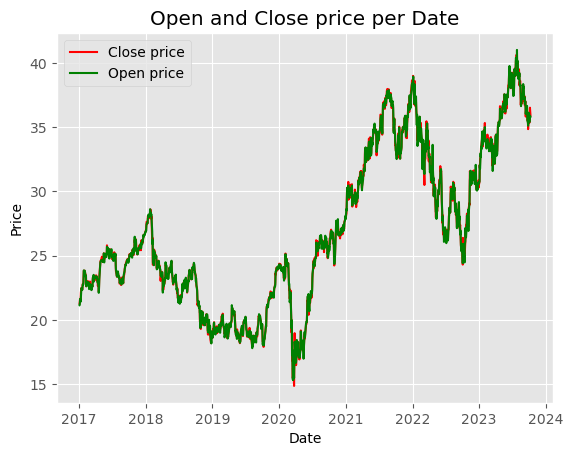

In [208]:
plt.plot(X_fm, y_fm, color='r', label='Close price') 
plt.plot(X_fm, z_fm, color='g', label='Open price') 

plt.xlabel("Date") 
plt.ylabel("Price") 
plt.title("Open and Close price per Date") 
plt.legend() 
plt.show() 

In [17]:
data = csvframe[["Close", "Date"]]
data = data.rename(columns = {'Close':'Actual_Close', 'Date':'Actual_Date'})

# Setup our target.  This identifies if the price went up or down
data["Target"] = csvframe.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

C:\Users\mirak\AppData\Local\Temp\ipykernel_23724\4161038273.py:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  data["Target"] = csvframe.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]


In [18]:
data.head()

,Actual_Close,Actual_Date,Target
0,21.280001,2017-01-03,NaN
1,21.370001,2017-01-04,1.0
2,21.559999,2017-01-05,1.0
3,21.600000,2017-01-06,1.0
4,21.500000,2017-01-09,0.0


In [19]:
csvframe_prev = csvframe.copy()
csvframe_prev = csvframe_prev.shift(1)

In [20]:
csvframe_prev.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-03,21.139999,21.280001,21.110001,21.280001,16.816923,2009000.0
2,2017-01-04,21.150000,21.379999,21.139999,21.370001,16.888046,2333100.0
3,2017-01-05,21.350000,21.580000,21.350000,21.559999,17.038197,1515100.0
4,2017-01-06,21.620001,21.680000,21.559999,21.600000,17.069805,1118300.0


In [21]:
predictors = ["Open", "High", "Low","Close", "Volume"]

In [22]:
data = data.join(csvframe_prev[predictors]).iloc[1:]

In [23]:
data.head()

,Actual_Close,Actual_Date,Target,Open,High,Low,Close,Volume
1,21.370001,2017-01-04,1.0,21.139999,21.280001,21.110001,21.280001,2009000.0
2,21.559999,2017-01-05,1.0,21.150000,21.379999,21.139999,21.370001,2333100.0
3,21.600000,2017-01-06,1.0,21.350000,21.580000,21.350000,21.559999,1515100.0
4,21.500000,2017-01-09,0.0,21.620001,21.680000,21.559999,21.600000,1118300.0
5,22.100000,2017-01-10,1.0,21.410000,21.549999,21.379999,21.500000,1359100.0


In [25]:
data.to_csv("ABB_fullset.csv")

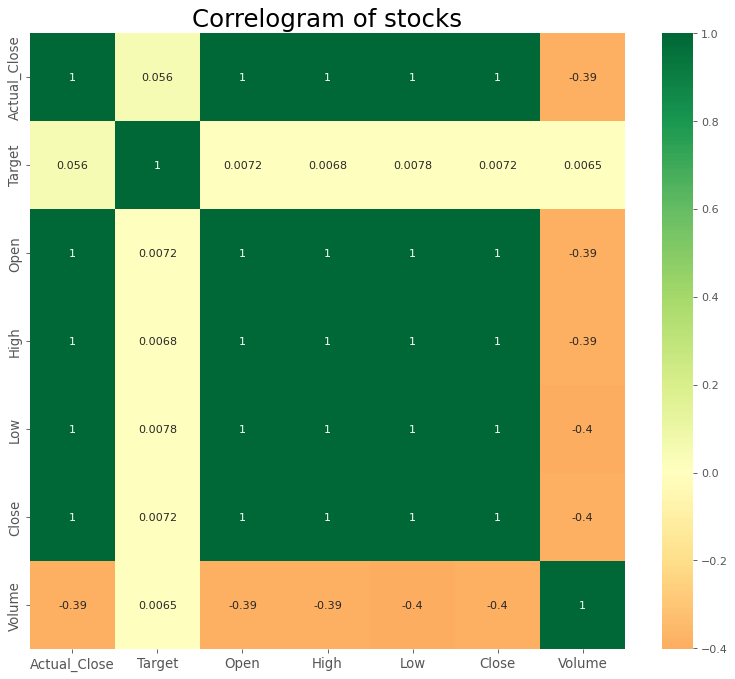

In [219]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of stocks', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [29]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

In [7]:
data.read_csv("ABB_fullset.csv")

NameError: name 'data' is not defined

In [31]:
train = data.iloc[:-200]
validation = data.iloc[-200:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [38]:
train.head()

,Actual_Close,Actual_Date,Target,Open,High,Low,Close,Volume
1,21.370001,2017-01-04,1.0,21.139999,21.280001,21.110001,21.280001,2009000.0
2,21.559999,2017-01-05,1.0,21.150000,21.379999,21.139999,21.370001,2333100.0
3,21.600000,2017-01-06,1.0,21.350000,21.580000,21.350000,21.559999,1515100.0
4,21.500000,2017-01-09,0.0,21.620001,21.680000,21.559999,21.600000,1118300.0
5,22.100000,2017-01-10,1.0,21.410000,21.549999,21.379999,21.500000,1359100.0


In [36]:
from sklearn.metrics import precision_score
preds = model.predict(validation[predictors])
preds = pd.Series(preds, index=validation.index)
precision_score(validation["Target"], preds)

0.6290322580645161

<Axes: >

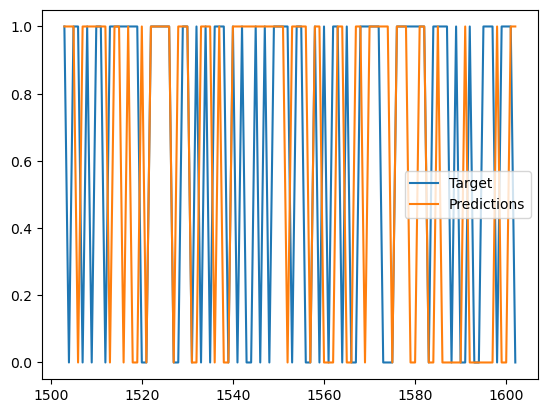

In [37]:
combined = pd.concat({"Target": validation["Target"],"Predictions": preds}, axis=1)
combined.plot()

([], [])

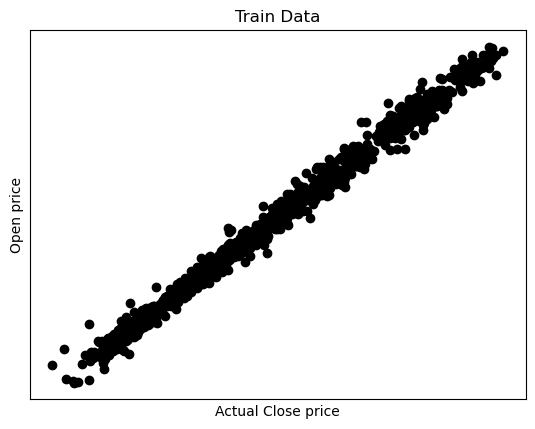

In [41]:
plt.scatter(train["Actual_Close"], train["Open"],  color='black') 
plt.title('Train Data') 
plt.xlabel('Actual Close price') 
plt.ylabel('Open price') 
plt.xticks(()) 
plt.yticks(()) 

In [42]:
regr_model = linear_model.LinearRegression() 

In [46]:
regr_model.fit(train[["Actual_Close"]], train[["Open"]]) 

LinearRegression()

In [47]:
y_pred = regr_model.predict(validation[["Actual_Close"]])

In [48]:
y_pred

array([[30.43921521],
       [30.10077072],
       [30.26999297],
       [30.60843746],
       [30.24013121],
       [30.84733946],
       [30.42926096],
       [30.74779895],
       [32.03189619],
       [31.78303995],
       [32.4698812 ],
       [32.75855544],
       [32.87800544],
       [33.35581342],
       [33.47526243],
       [33.53498992],
       [34.05260693],
       [33.94311416],
       [33.42549217],
       [33.91324843],
       [34.12228668],
       [34.17206092],
       [34.22183117],
       [34.69963517],
       [34.59013742],
       [34.35123841],
       [34.79917567],
       [35.27698365],
       [33.88338667],
       [34.34128117],
       [33.82366018],
       [33.95306642],
       [33.44540167],
       [33.48521568],
       [33.58476017],
       [34.01279292],
       [33.76393667],
       [34.37114293],
       [33.96301868],
       [34.12228668],
       [33.44540167],
       [33.44540167],
       [33.74402817],
       [33.11690943],
       [33.45535393],
       [33

In [57]:
regr_model.score(data[["Actual_Close"]], data[["Open"]])

0.9936394852285438

In [62]:
this_X = np.c_[35.19, ].T #35.51
this_y_pred = regr_model.predict(this_X)
this_y_pred

c:\Users\mirak\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[35.13762216]])

In [221]:
this_X = np.c_[24.91, ].T #24.61
this_y_pred = regr_model.predict(this_X)
this_y_pred

c:\Users\mirak\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[24.90465327]])

In [220]:
this_X = np.c_[17.53, ].T #17.19
this_y_pred = regr_model.predict(this_X)
this_y_pred

c:\Users\mirak\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[17.55841684]])

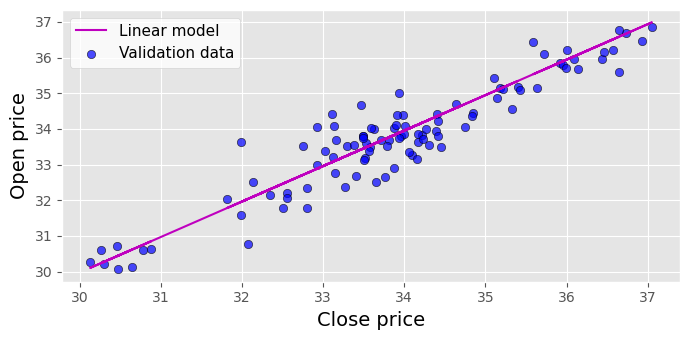

In [53]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(validation[["Actual_Close"]], y_pred, color='m', label='Linear model')
ax.scatter(validation[["Actual_Close"]], validation[["Open"]], edgecolor='k', facecolor='blue', alpha=0.7, label='Validation data')
ax.set_ylabel('Open price', fontsize=14)
ax.set_xlabel('Close price', fontsize=14)
ax.legend(facecolor='white', fontsize=11)

fig.tight_layout()

In [54]:
from sklearn.svm import LinearSVR, SVR

In [55]:
svm_reg_model = LinearSVR(epsilon=1.5)
svm_reg_model.fit(train[["Actual_Close"]], train[["Open"]])

c:\Users\mirak\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mirak\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(epsilon=1.5)

In [56]:
y_pred = svm_reg_model.predict(validation[["Actual_Close"]])

In [63]:
svm_reg_model.score(data[["Actual_Close"]], data[["Open"]])

0.9932736750847966

In [64]:
this_X = np.c_[35.19, ].T #35.51
this_y_pred = svm_reg_model.predict(this_X)
this_y_pred


c:\Users\mirak\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(


array([35.21447273])

In [65]:
svm_poly_reg_model = SVR(kernel = "poly", degree = 2, C = 100, epsilon= 0.1)

In [66]:
svm_poly_reg_model.fit(train[["Actual_Close"]], train[["Open"]])

c:\Users\mirak\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, degree=2, kernel='poly')

In [67]:
y_pred = svm_poly_reg_model.predict(validation[["Actual_Close"]])

In [68]:
svm_poly_reg_model.score(data[["Actual_Close"]], data[["Open"]])

0.9806057313294463

In [69]:
this_X = np.c_[35.19, ].T #35.51
this_y_pred = svm_poly_reg_model.predict(this_X)
this_y_pred

c:\Users\mirak\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([35.84584027])

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(train[["Actual_Close"]], train[["Target"]])


In [ ]:
tree_pred_val = tree_clf.predict(validation[["Actual_Close"]])
tree_pred_val

In [ ]:
accuracy_score(validation[["Target"]], tree_pred_val)

In [ ]:
this_X = np.c_[35.19, ].T #35.51
this_y_pred = tree_clf.predict(this_X)
this_y_pred

Neural Network

In [167]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow import keras

In [168]:
sc = MinMaxScaler()
scaler = sc.fit(train[["Actual_Close"]])
X_train_scaled = scaler.transform(train[["Actual_Close"]])
X_val_scaled = scaler.transform(validation[["Actual_Close"]])

In [127]:
#scaler_y = sc.fit(train[["Open"]])
#y_train_scaled = scaler_y.transform(train[["Open"]])
#y_val_scaled = scaler_y.transform(validation[["Open"]])

In [169]:
X_train_scaled

array([[0.26997934],
       [0.27784675],
       [0.27950311],
       ...,
       [0.636853  ],
       [0.6318841 ],
       [0.63229818]])

In [170]:
print(X_train_scaled)
print(X_train_scaled.min())
print(X_train_scaled.max())
print(X_train_scaled.size)

[[0.26997934]
 [0.27784675]
 [0.27950311]
 ...
 [0.636853  ]
 [0.6318841 ]
 [0.63229818]]
0.0
1.0
1502


In [178]:
print(X_val_scaled)
print(X_val_scaled.min())
print(X_val_scaled.max())
print(X_val_scaled.size)

[[0.64679085]
 [0.63271217]
 [0.63975151]
 [0.65383019]
 [0.63850932]
 [0.66376807]
 [0.64637677]
 [0.65962737]
 [0.71304348]
 [0.70269151]
 [0.73126286]
 [0.74327118]
 [0.74824008]
 [0.76811602]
 [0.77308489]
 [0.77556944]
 [0.79710137]
 [0.79254667]
 [0.77101453]
 [0.79130431]
 [0.79999992]
 [0.80207043]
 [0.80414079]
 [0.82401656]
 [0.81946166]
 [0.80952389]
 [0.82815727]
 [0.84803321]
 [0.79006211]
 [0.80910969]
 [0.7875776 ]
 [0.79296066]
 [0.77184273]
 [0.77349892]
 [0.77763979]
 [0.79544518]
 [0.78509321]
 [0.81035188]
 [0.79337466]
 [0.79999992]
 [0.77184273]
 [0.77184273]
 [0.78426505]
 [0.75817805]
 [0.77225673]
 [0.76397511]
 [0.77474124]
 [0.78095234]
 [0.79958592]
 [0.80248447]
 [0.77598344]
 [0.78881996]
 [0.79006211]
 [0.75734986]
 [0.74824008]
 [0.78302269]
 [0.70973085]
 [0.73291921]
 [0.70973085]
 [0.73333337]
 [0.76273292]
 [0.7565217 ]
 [0.76728783]
 [0.74120083]
 [0.71594199]
 [0.7242236 ]
 [0.74327118]
 [0.77846799]
 [0.80538298]
 [0.81035188]
 [0.78923395]
 [0.75

In [240]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,50),
                        max_iter = 100,activation = 'relu',
                        solver = 'adam')

In [241]:
mlp_clf.fit(X_train_scaled, train[["Target"]])

c:\Users\mirak\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100)

In [242]:
validation[["Target"]]

,Target
1503,1.0
1504,0.0
1505,1.0
1506,1.0
1507,0.0
...,...
1598,0.0
1599,1.0
1600,1.0
1601,1.0


In [243]:
y_pred = mlp_clf.predict(X_val_scaled)

In [244]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [261]:
print('Accuracy: {:.2f}'.format(accuracy_score(validation[["Target"]], y_pred)))

Accuracy: 0.64


In [246]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

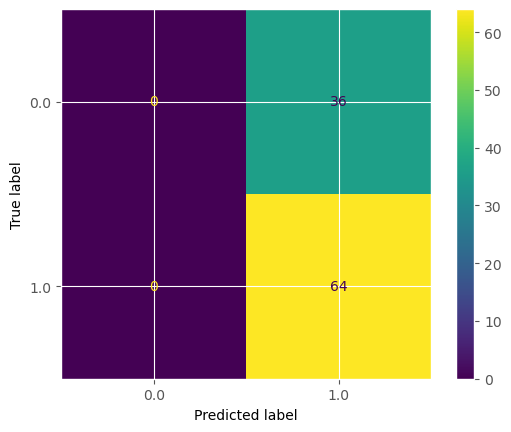

In [247]:
cm = confusion_matrix(validation[["Target"]], y_pred, labels=mlp_clf.classes_)
fig = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_clf.classes_)
fig.plot()
plt.show()

In [190]:
param_grid = {
    'hidden_layer_sizes': [(100,100),(100,50),(100,100,50),(100,50,50), (100,50,10), (100,50,25,10), (100,75,50,25,10)],
    'max_iter': [10, 50, 100],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [191]:
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train_scaled, train[["Target"]])

print(grid.best_params_) 

{'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 10, 'solver': 'adam'}


c:\Users\mirak\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mirak\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
n_cols = train[["Actual_Close"]].shape[1]
n_cols

NameError: name 'train' is not defined

In [205]:
import tensorflow as tf
from tensorflow import keras

In [213]:
dnn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu', input_shape = (n_cols, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'relu')
])

In [262]:
dnn_model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss = 'mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(patience = 2)
dnn_model_trained = dnn_model.fit(X_train_scaled, train[["Target"]], validation_split = 0.2, epochs = 50, callbacks = [early_stopping_monitor])

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Assign object at 0x0000015643C3F490>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Assign object at 0x0000015643C3F490>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
24/38 [=================>............] - ETA: 0s - loss: 0.5091 - accuracy: 0.4909 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001563E0569D0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, 

In [263]:
dnn_model.evaluate(X_val_scaled, validation[["Target"]], verbose=2)

4/4 - 0s - loss: 0.6400 - accuracy: 0.3600 - 26ms/epoch - 7ms/step


[0.6399999856948853, 0.36000001430511475]

In [4]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(n_cols, )))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=5, max_value=200, step=5)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(keras.layers.Dense(1, activation = 'relu'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE),
                metrics=['accuracy'])

    return model

In [ ]:
#py -m pip install scikeras
#pip install scikeras[tensorflow]
#pip3 install --upgrade tensorflow --user

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
import scikeras

In [3]:
keras_class = scikeras.wrappers.KerasClassifier(model=build_model, epochs=100, batch_size=5, verbose=0)

AttributeError: module 'scikeras' has no attribute 'wrappers'

In [266]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

In [267]:
results = cross_val_score(keras_class, X_train_scaled, train[["Target"]], cv=kfold)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Assign object at 0x0000015641EBACA0>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Assign object at 0x0000015641EBACA0>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Assign object at 0x0000015641E53CD0>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this 

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mirak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling layer 'sequential_32' (type Sequential).

Input 0 of layer "dense_76" is incompatible with the layer: expected axis -1 of input shape to have value 100, but received input with shape (None, 1)

Call arguments received by layer 'sequential_32' (type Sequential):
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • training=True
  • mask=None

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mirak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling layer 'sequential_33' (type Sequential).

Input 0 of layer "dense_79" is incompatible with the layer: expected axis -1 of input shape to have value 100, but received input with shape (None, 1)

Call arguments received by layer 'sequential_33' (type Sequential):
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • training=True
  • mask=None

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mirak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling layer 'sequential_34' (type Sequential).

Input 0 of layer "dense_82" is incompatible with the layer: expected axis -1 of input shape to have value 100, but received input with shape (None, 1)

Call arguments received by layer 'sequential_34' (type Sequential):
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • training=True
  • mask=None

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mirak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling layer 'sequential_35' (type Sequential).

Input 0 of layer "dense_85" is incompatible with the layer: expected axis -1 of input shape to have value 100, but received input with shape (None, 1)

Call arguments received by layer 'sequential_35' (type Sequential):
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • training=True
  • mask=None

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mirak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling layer 'sequential_36' (type Sequential).

Input 0 of layer "dense_88" is incompatible with the layer: expected axis -1 of input shape to have value 100, but received input with shape (None, 1)

Call arguments received by layer 'sequential_36' (type Sequential):
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • training=True
  • mask=None

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mirak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling layer 'sequential_37' (type Sequential).

Input 0 of layer "dense_91" is incompatible with the layer: expected axis -1 of input shape to have value 100, but received input with shape (None, 1)

Call arguments received by layer 'sequential_37' (type Sequential):
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • training=True
  • mask=None

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mirak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling layer 'sequential_38' (type Sequential).

Input 0 of layer "dense_94" is incompatible with the layer: expected axis -1 of input shape to have value 100, but received input with shape (None, 1)

Call arguments received by layer 'sequential_38' (type Sequential):
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • training=True
  • mask=None

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mirak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling layer 'sequential_39' (type Sequential).

Input 0 of layer "dense_97" is incompatible with the layer: expected axis -1 of input shape to have value 100, but received input with shape (None, 1)

Call arguments received by layer 'sequential_39' (type Sequential):
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • training=True
  • mask=None

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mirak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling layer 'sequential_40' (type Sequential).

Input 0 of layer "dense_100" is incompatible with the layer: expected axis -1 of input shape to have value 100, but received input with shape (None, 1)

Call arguments received by layer 'sequential_40' (type Sequential):
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • training=True
  • mask=None

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\mirak\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 760, in fit
    self._fit(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 928, in _fit
    self._fit_keras_model(
  File "c:\Users\mirak\anaconda3\lib\site-packages\scikeras\wrappers.py", line 524, in _fit_keras_model
    hist = self.model_.fit(x=X, y=y, **fit_args)
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\mirak\anaconda3\lib\site-packages\keras\src\engine\input_spec.py", line 280, in assert_input_compatibility
    raise ValueError(
ValueError: Exception encountered when calling layer 'sequential_41' (type Sequential).

Input 0 of layer "dense_103" is incompatible with the layer: expected axis -1 of input shape to have value 100, but received input with shape (None, 1)

Call arguments received by layer 'sequential_41' (type Sequential):
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • training=True
  • mask=None


In [ ]:
#pip install yfinance

In [ ]:
#import yfinance as yf

#abb = yf.Ticker("ABBNY")
#abb_hist = abb.history(period="max")

In [ ]:
#import os
#import pandas as pd

#DATA_PATH = "abb_data.json"

#if os.path.exists(DATA_PATH):
    # Read from file if we've already downloaded the data.
    #with open(DATA_PATH) as f:
        #abb_hist = pd.read_json(DATA_PATH)
#else:
    #abb = yf.Ticker("ABBNY")
    #abb_hist = abb.history(period="max")

    # Save file to json in case we need it later.  This prevents us from having to re-download it every time.
    #abb_hist.to_json(DATA_PATH)

In [ ]:
#abb_hist.plot.line(y="Close", use_index=True)